In [28]:
#Linear Regression and Error Metrics

#This notebook shows several different errors metrics that a linear regression (Ax=b) could try to minimize to create a best-fit line
#In particular, we will see how some error metrics are much more sensitive to outliers in the data than others

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]
rcParams.update({'font.size': 18})

#Function definitions
#x0[0]*x + x0[1] is the line value: f(x_k)=(mx+b)
#y is the data value: y=y_k

#E_inf - Maximum Error (max distance between line and data point)
def fit1(x0,t):
    x,y=t
    return np.max(np.abs(x0[0]*x + x0[1]-y))
#E_1 - Mean Absolute Error (sum of distances between line and data points, for all data points, divided bu number of data points)
def fit2(x0,t):
    x,y=t
    return np.sum(np.abs(x0[0]*x + x0[1]-y))
#E_2 - Least-Squares Error (sum of square-root of distances between line and data points, for all data points, divided by number of data points, all sqaured)/
#Note,this function does not actually take the square root or multiply by 1/n as it is unnecessary here
def fit3(x0,t):
    x,y=t
    return np.sum(np.power(np.abs(x0[0]*x + x0[1]-y),2))
#E_p
def fit4(x0,t,p):
    x,y=t
    return np.sum(np.power(np.abs(x0[0]*x + x0[1]-y),p))

Optimization terminated successfully.
         Current function value: 0.230040
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 1.385764
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.288000
         Iterations: 54
         Function evaluations: 102
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 57
         Function evaluations: 110


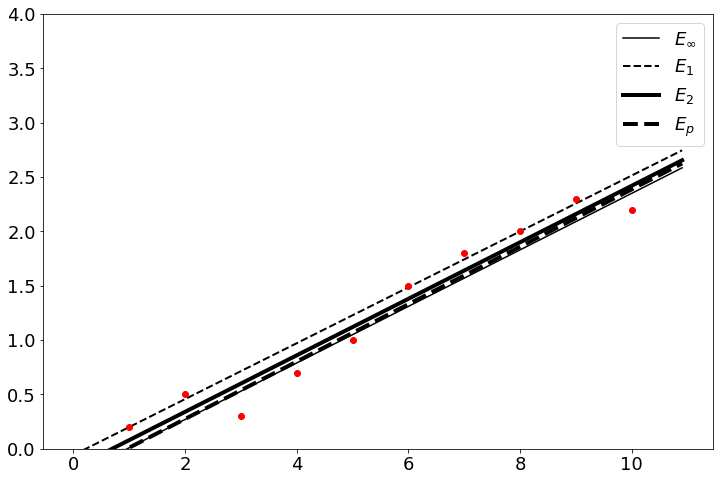

In [9]:
# The data
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)

#inital guess of 1x+1
x0 = np.array([1,1])
p=10;
#find best fit for each of three errors (uses simplex algorithm)
p1 = scipy.optimize.fmin(fit1,x0,args=(t,));
p2 = scipy.optimize.fmin(fit2,x0,args=(t,));
p3 = scipy.optimize.fmin(fit3,x0,args=(t,));
p4 = scipy.optimize.fmin(fit4,x0,args=(t,p))

#evaluate optimized function at several points
xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)
y4 = np.polyval(p4,xf)

#plot results
plt.figure()
plt.plot(xf,y1,color='k',label='$E_\infty$')
plt.plot(xf,y2,'--',color='k',linewidth=2, label='$E_1$')
plt.plot(xf,y3,color='k',linewidth=4, label='$E_2$')
plt.plot(xf,y4,'--',color='k',linewidth=4,label='$E_p$')
plt.plot(x,y,'o',color='r', linewidth=2)

plt.ylim(0,4)
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 3.640022
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 6.234182
         Iterations: 49
         Function evaluations: 92
Optimization terminated successfully.
         Current function value: 468479597.449446
         Iterations: 69
         Function evaluations: 133


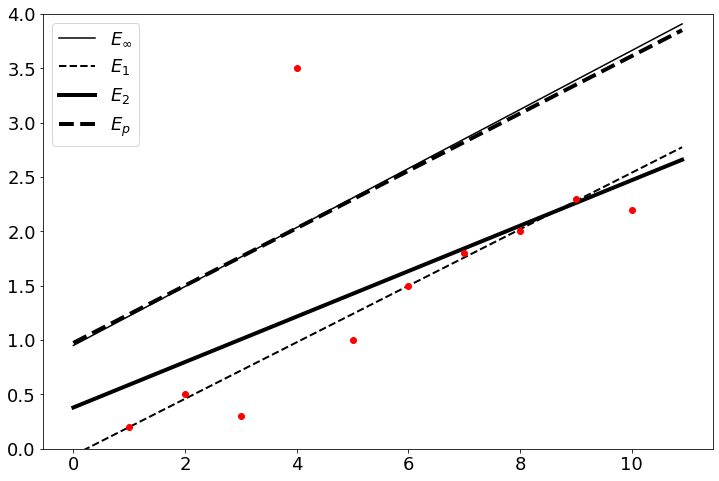

In [13]:
#Note the outlier in the data, 3.5
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)
p=50;

x0 = np.array([1,1])
p1 = scipy.optimize.fmin(fit1,x0,args=(t,));
p2 = scipy.optimize.fmin(fit2,x0,args=(t,));
p3 = scipy.optimize.fmin(fit3,x0,args=(t,));
p4 = scipy.optimize.fmin(fit4,x0,args=(t,p))

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)
y4 = np.polyval(p4,xf)

plt.figure()
plt.plot(xf,y1,color='k',label='$E_\infty$')
plt.plot(xf,y2,'--',color='k',linewidth=2,label='$E_1$')
plt.plot(xf,y3,color='k',linewidth=4,label='$E_2$')
plt.plot(xf,y4,'--',color='k',linewidth=4,label='$E_p$')
plt.plot(x,y,'o',color='r',linewidth=2)

plt.ylim(0,4)
plt.legend()
plt.show()